# Imports

In [1]:
# imports
import numpy as np
import torch
from tueplots import bundles, figsizes
import wandb
import matplotlib.pyplot as plt

import sys

%load_ext autoreload
%autoreload 2

sys.path.insert(0, '.')

In [4]:
from analysis import sweep2df, learning_stats,corrected_jacobian_stats, RED, BLUE


In [5]:
plt.rcParams.update(bundles.neurips2022(usetex=True))
plt.rcParams.update({
    'text.latex.preamble': [r'\usepackage{amsfonts}', # mathbb
                            r'\usepackage{amsmath}'] # boldsymbol
})

/Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versions/3.8/lib/python3.8/_collections_abc.py:834: MatplotlibDeprecationWarning: Support for setting the 'text.latex.preamble' or 'pgf.preamble' rcParam to a list of strings is deprecated since 3.3 and will be removed two minor releases later; set it to a single string instead.
  self[key] = other[key]


In [6]:
# Constants
ENTITY = "causal-representation-learning"
PROJECT = "nl-causal-representations"

# W&B API
api = wandb.Api(timeout=200)
runs = api.runs(ENTITY + "/" + PROJECT)

# Data loading

## 3D SEM

In [7]:
SWEEP_ID = "9b8ibcef"
sweep = api.sweep(f"{ENTITY}/{PROJECT}/{SWEEP_ID}")
filename = f"sem_3d_munkres_sweep_{SWEEP_ID}"
df3d, (true_unmix_jacobians3d, est_unmix_jacobians3d, permute_indices3d, hsic_adj3d, ica_permute3d) = sweep2df(sweep.runs, filename, save=True, load=False)

In [8]:
SWEEP_ID = "f6c2fdfr"
sweep = api.sweep(f"{ENTITY}/{PROJECT}/{SWEEP_ID}")
filename = f"sem_3d_permute_sweep_{SWEEP_ID}"
df3d_permute, (true_unmix_jacobians3d_permute, est_unmix_jacobians3d_permute, permute_indices3d_permute, hsic_adj3d_permute, ica_permute3d_permute) = sweep2df(sweep.runs, filename, save=True, load=False)

Encountered a faulty run with ID kind-sweep-54


In [44]:
SWEEP_ID = "e0swc99a"
sweep = api.sweep(f"{ENTITY}/{PROJECT}/{SWEEP_ID}")
filename = f"sem_3d_sparse_sweep_{SWEEP_ID}"
df3d_sparse, (true_unmix_jacobians3d_sparse, est_unmix_jacobians3d_sparse, permute_indices3d_sparse, hsic_adj3d_sparse, ica_permute3d_sparse) = sweep2df(sweep.runs, filename, save=True, load=True)

	 Loading sem_3d_sparse_sweep_e0swc99a...


## 5D SEM

In [18]:
SWEEP_ID = "tzigp5kf"
sweep = api.sweep(f"{ENTITY}/{PROJECT}/{SWEEP_ID}")
filename = f"sem_5d_munkres_sweep_{SWEEP_ID}"
df5d, (true_unmix_jacobians5d, est_unmix_jacobians5d, permute_indices5d, hsic_adj5d, ica_permute5d) = sweep2df(sweep.runs, filename, save=True, load=False)

In [19]:
SWEEP_ID = "6cqs4k9t"
sweep = api.sweep(f"{ENTITY}/{PROJECT}/{SWEEP_ID}")
filename = f"sem_5d_permute_sweep_{SWEEP_ID}"
df5d_permute, (true_unmix_jacobians5d_permute, est_unmix_jacobians5d_permute, permute_indices5d_permute, hsic_adj5d_permute, ica_permute5d_permute) = sweep2df(sweep.runs, filename, save=True, load=False)

Encountered a faulty run with ID gentle-sweep-19
Encountered a faulty run with ID dauntless-sweep-14


In [20]:
SWEEP_ID = "l9wisrgk"
sweep = api.sweep(f"{ENTITY}/{PROJECT}/{SWEEP_ID}")
filename = f"sem_5d_sparse_sweep_{SWEEP_ID}"
df5d_sparse, (true_unmix_jacobians5d_sparse, est_unmix_jacobians5d_sparse, permute_indices5d_sparse,hsic_adj5d_sparse, ica_permute5d_sparse) = sweep2df(sweep.runs, filename, save=True, load=False)

Encountered a faulty run with ID dulcet-sweep-18


## 8D SEM

In [ ]:
SWEEP_ID = "v2du3d05"
sweep = api.sweep(f"{ENTITY}/{PROJECT}/{SWEEP_ID}")
filename = f"sem_8d_munkres_sweep_{SWEEP_ID}"
df8d, (true_unmix_jacobians8d, est_unmix_jacobians8d, permute_indices8d, hsic_adj8d, ica_permute8d) = sweep2df(sweep.runs, filename, save=True, load=False)

In [ ]:
SWEEP_ID = "si6590ko"
sweep = api.sweep(f"{ENTITY}/{PROJECT}/{SWEEP_ID}")
filename = f"sem_8d_permute_sweep_{SWEEP_ID}"
df8d_permute, (true_unmix_jacobians8d_permute, est_unmix_jacobians8d_permute, permute_indices8d_permute, hsic_adj8d_permute, ica_permute8d_permute) = sweep2df(sweep.runs, filename, save=True, load=True)

In [50]:
SWEEP_ID = "7asi8ixl"
sweep = api.sweep(f"{ENTITY}/{PROJECT}/{SWEEP_ID}")
filename = f"sem_8d_sparse_sweep_{SWEEP_ID}"
df8d_sparse, (true_unmix_jacobians8d_sparse, est_unmix_jacobians8d_sparse, permute_indices8d_sparse,hsic_adj8d_sparse, ica_permute8d_sparse) = sweep2df(sweep.runs, filename, save=True, load=True)

	 Loading sem_8d_sparse_sweep_7asi8ixl...


## 10D SEM

In [ ]:
SWEEP_ID = "hwapefxy"
sweep = api.sweep(f"{ENTITY}/{PROJECT}/{SWEEP_ID}")
filename = f"sem_10d_munkres_sweep_{SWEEP_ID}"
df10d, (true_unmix_jacobians10d, est_unmix_jacobians10d, permute_indices10d, hsic_adj10d, ica_permute10d) = sweep2df(sweep.runs, filename, save=True, load=False)

In [ ]:
SWEEP_ID = "ku9wl27d"
sweep = api.sweep(f"{ENTITY}/{PROJECT}/{SWEEP_ID}")
filename = f"sem_10d_sweep_{SWEEP_ID}"
df10d_permute, (true_unmix_jacobians10d_permute, est_unmix_jacobians10d_permute, permute_indices10d_permute, hsic_adj10d_permute, ica_permute10d_permute) = sweep2df(sweep.runs, filename, save=True, load=False)

In [54]:
SWEEP_ID = "jk11nvgk"
sweep = api.sweep(f"{ENTITY}/{PROJECT}/{SWEEP_ID}")
filename = f"sem_10d_sparse_sweep_{SWEEP_ID}"
df10d_sparse, (true_unmix_jacobians10d_sparse, est_unmix_jacobians10d_sparse, permute_indices10d_sparse,hsic_adj10d_sparse, ica_permute10d_sparse) = sweep2df(sweep.runs, filename, save=True, load=True)

	 Loading sem_10d_sparse_sweep_jk11nvgk...


## 15D SEM

In [ ]:
SWEEP_ID = "w7517p57"
sweep = api.sweep(f"{ENTITY}/{PROJECT}/{SWEEP_ID}")
filename = f"sem_15d_sweep_{SWEEP_ID}"
df15d, (true_unmix_jacobians15d, est_unmix_jacobians15d, permute_indices15d, hsic_adj15d, ica_permute15d) = sweep2df(sweep.runs, filename, save=True, load=False)

## MLP from Monti et al.

In [ ]:
SWEEP_ID = "8tis6u9i"
sweep = api.sweep(f"{ENTITY}/{PROJECT}/{SWEEP_ID}")
filename = f"monti_munkres_sweep_{SWEEP_ID}"
df_monti, (true_unmix_jacobians_monti, est_unmix_jacobians_monti, permute_indices_monti, hsic_adj_mont, ica_permute_monti) = sweep2df(sweep.runs, filename, save=True, load=False)

## Monti variants

In [121]:
SWEEP_ID = "9z269wur"
sweep = api.sweep(f"{ENTITY}/{PROJECT}/{SWEEP_ID}")
filename = f"monti_sparse_sweep_{SWEEP_ID}"
df_monti_sparse, (true_unmix_jacobians_monti_sparse, est_unmix_jacobians_monti_sparse, permute_indices_monti_sparse, hsic_adj_monti_sparse, ica_permute_monti_sparse) = sweep2df(sweep.runs, filename, save=True, load=True)

	 Loading monti_sparse_sweep_9z269wur...


# Pre-processing


## Corrected stats

### 3D SEM

In [77]:
stats3d=corrected_jacobian_stats(df3d, true_unmix_jacobians3d, est_unmix_jacobians3d, permute_indices3d, hsic_adj3d, ica_permute3d)

----We need to figure out whether HSIC needs to be corrected--------
----------------------------------
dim=3 (nonlin_sem=True)	MCC=0.969+0.098	  Acc:0.956+0.133	Acc (HSIC):0.611+0.167	SHD:0.044444+0.133333	[10 items]
----------------------------------
dim=3 (nonlin_sem=False)	MCC=1.000+0.000	  Acc:1.000+0.000	Acc (HSIC):0.578+0.156	SHD:0.000000+0.000000	[10 items]


In [78]:
stats3d_permute=corrected_jacobian_stats(df3d_permute, true_unmix_jacobians3d_permute, est_unmix_jacobians3d_permute, permute_indices3d_permute, hsic_adj3d_permute, ica_permute3d_permute)

----We need to figure out whether HSIC needs to be corrected--------
----------------------------------
dim=3 (nonlin_sem=True)	MCC=1.000+0.000	  Acc:0.844+0.101	Acc (HSIC):0.494+0.143	SHD:0.111111+0.000000	[27 items]
----------------------------------
dim=3 (nonlin_sem=False)	MCC=1.000+0.000	  Acc:0.854+0.106	Acc (HSIC):0.521+0.200	SHD:0.111111+0.000000	[29 items]


In [79]:
stats3d_sparse=corrected_jacobian_stats(df3d_sparse, true_unmix_jacobians3d_sparse, est_unmix_jacobians3d_sparse, permute_indices3d_sparse, hsic_adj3d_sparse, ica_permute3d_sparse)

----We need to figure out whether HSIC needs to be corrected--------
----------------------------------
dim=3 (nonlin_sem=True)	MCC=1.000+0.000	  Acc:1.000+0.000	Acc (HSIC):0.630+0.105	SHD:0.111111+0.000000	[3 items]
----------------------------------
dim=3 (nonlin_sem=False)	MCC=1.000+0.000	  Acc:0.944+0.096	Acc (HSIC):0.667+0.176	SHD:0.111111+0.000000	[4 items]


### 5D SEM

In [80]:
stats5d=corrected_jacobian_stats(df5d, true_unmix_jacobians5d, est_unmix_jacobians5d, permute_indices5d, hsic_adj5d, ica_permute5d)

----We need to figure out whether HSIC needs to be corrected--------
----------------------------------
dim=5 (nonlin_sem=True)	MCC=0.960+0.079	  Acc:0.884+0.160	Acc (HSIC):0.662+0.071	SHD:0.115556+0.160493	[9 items]
----------------------------------
dim=5 (nonlin_sem=False)	MCC=0.969+0.066	  Acc:0.928+0.131	Acc (HSIC):0.648+0.104	SHD:0.072000+0.131210	[10 items]


In [81]:
stats5d_permute=corrected_jacobian_stats(df5d_permute, true_unmix_jacobians5d_permute, est_unmix_jacobians5d_permute, permute_indices5d_permute, hsic_adj5d_permute, ica_permute5d_permute)

----We need to figure out whether HSIC needs to be corrected--------
----------------------------------
dim=5 (nonlin_sem=True)	MCC=0.984+0.049	  Acc:0.723+0.074	Acc (HSIC):0.503+0.110	SHD:0.248000+0.024000	[30 items]
----------------------------------
dim=5 (nonlin_sem=False)	MCC=1.000+0.000	  Acc:0.734+0.071	Acc (HSIC):0.500+0.110	SHD:0.248571+0.024744	[28 items]


In [114]:
stats5d_sparse=corrected_jacobian_stats(df5d_sparse, true_unmix_jacobians5d_sparse, est_unmix_jacobians5d_sparse, permute_indices5d_sparse, hsic_adj5d_sparse, ica_permute5d_sparse)

----We need to figure out whether HSIC needs to be corrected--------
----------------------------------
dim=5 (nonlin_sem=True)	MCC=0.969+0.061	  Acc:0.751+0.096	Acc (HSIC):0.676+0.102	Prec (HSIC):0.676+0.102	Rec (HSIC):0.676+0.102	SHD:0.222222+0.080247	[9 items]
----------------------------------
dim=5 (nonlin_sem=False)	MCC=0.961+0.062	  Acc:0.768+0.121	Acc (HSIC):0.608+0.069	Prec (HSIC):0.608+0.069	Rec (HSIC):0.608+0.069	SHD:0.256000+0.131697	[10 items]


### 8D SEM

In [68]:
stats8d=corrected_jacobian_stats(df8d, true_unmix_jacobians8d, est_unmix_jacobians8d,permute_indices8d,hsic_adj8d, ica_permute8d)

----We need to figure out whether HSIC needs to be corrected--------
----------------------------------
dim=8 (nonlin_sem=True)	MCC=0.980+0.030	  Acc:0.858+0.204	Acc (HSIC):0.943+0.023	SHD:0.142361+0.204183	[9 items]
----------------------------------
dim=8 (nonlin_sem=False)	MCC=1.000+0.000	  Acc:1.000+0.000	Acc (HSIC):0.931+0.028	SHD:0.000000+0.000000	[10 items]


In [69]:
stats8d_permute=corrected_jacobian_stats(df8d_permute, true_unmix_jacobians8d_permute, est_unmix_jacobians8d_permute,permute_indices8d_permute,hsic_adj8d_permute, ica_permute8d_permute)

----We need to figure out whether HSIC needs to be corrected--------
----------------------------------
dim=8 (nonlin_sem=True)	MCC=0.852+0.131	  Acc:0.657+0.070	Acc (HSIC):0.647+0.097	SHD:0.367996+0.044115	[29 items]
----------------------------------
dim=8 (nonlin_sem=False)	MCC=0.880+0.151	  Acc:0.646+0.050	Acc (HSIC):0.640+0.093	SHD:0.373958+0.060237	[30 items]


In [70]:
stats8d_sparse=corrected_jacobian_stats(df8d_sparse, true_unmix_jacobians8d_sparse, est_unmix_jacobians8d_sparse,permute_indices8d_sparse,hsic_adj8d_sparse, ica_permute8d_sparse)

----We need to figure out whether HSIC needs to be corrected--------
----------------------------------
dim=8 (nonlin_sem=True)	MCC=0.807+0.144	  Acc:0.660+0.062	Acc (HSIC):0.844+0.104	SHD:0.371528+0.084233	[9 items]
----------------------------------
dim=8 (nonlin_sem=False)	MCC=0.844+0.184	  Acc:0.709+0.084	Acc (HSIC):0.823+0.122	SHD:0.321875+0.108972	[10 items]


### 10D SEM

In [71]:
stats10d=corrected_jacobian_stats(df10d, true_unmix_jacobians10d, est_unmix_jacobians10d,permute_indices10d, hsic_adj10d, ica_permute10d)

----We need to figure out whether HSIC needs to be corrected--------
----------------------------------
dim=10 (nonlin_sem=True)	MCC=0.958+0.023	  Acc:0.591+0.221	Acc (HSIC):0.921+0.019	SHD:0.408889+0.221131	[9 items]
----------------------------------
dim=10 (nonlin_sem=False)	MCC=0.965+0.030	  Acc:0.832+0.176	Acc (HSIC):0.926+0.020	SHD:0.168000+0.176000	[10 items]


In [72]:
stats10d_permute=corrected_jacobian_stats(df10d_permute, true_unmix_jacobians10d_permute, est_unmix_jacobians10d_permute,permute_indices10d_permute, hsic_adj10d_permute, ica_permute10d_permute)

----We need to figure out whether HSIC needs to be corrected--------
----------------------------------
dim=10 (nonlin_sem=True)	MCC=0.872+0.185	  Acc:0.587+0.056	Acc (HSIC):0.608+0.102	SHD:0.385333+0.054634	[30 items]
----------------------------------
dim=10 (nonlin_sem=False)	MCC=0.903+0.189	  Acc:0.596+0.045	Acc (HSIC):0.611+0.103	SHD:0.382667+0.046686	[30 items]


In [73]:
stats10d_sparse=corrected_jacobian_stats(df10d_sparse, true_unmix_jacobians10d_sparse, est_unmix_jacobians10d_sparse,permute_indices10d_sparse, hsic_adj10d_sparse, ica_permute10d_sparse)

----We need to figure out whether HSIC needs to be corrected--------
----------------------------------
dim=10 (nonlin_sem=True)	MCC=0.730+0.202	  Acc:0.616+0.034	Acc (HSIC):0.810+0.121	SHD:0.365556+0.078047	[9 items]
----------------------------------
dim=10 (nonlin_sem=False)	MCC=0.800+0.217	  Acc:0.648+0.059	Acc (HSIC):0.829+0.124	SHD:0.336000+0.055353	[10 items]


### 15D SEM

In [74]:
stats15d=corrected_jacobian_stats(df15d, true_unmix_jacobians15d, est_unmix_jacobians15d, permute_indices15d, hsic_adj15d, ica_permute15d)

----We need to figure out whether HSIC needs to be corrected--------
----------------------------------
dim=15 (nonlin_sem=True)	MCC=0.788+0.055	  Acc:0.637+0.041	Acc (HSIC):0.916+0.018	SHD:0.362222+0.040307	[10 items]
----------------------------------
dim=15 (nonlin_sem=False)	MCC=0.797+0.032	  Acc:0.629+0.045	Acc (HSIC):0.918+0.016	SHD:0.371852+0.045614	[9 items]


### MLP from Monti et al.

In [76]:
stats_monti=corrected_jacobian_stats(df_monti, true_unmix_jacobians_monti, est_unmix_jacobians_monti, permute_indices_monti, hsic_adj_mont, ica_permute_monti, selector_col="n_mixing_layer")

----We need to figure out whether HSIC needs to be corrected--------
----------------------------------
dim=6 (n_mixing_layer=5)	MCC=0.817+0.043	  Acc:0.800+0.075	Acc (HSIC):0.589+0.083	SHD:0.000000+0.000000	[5 items]
----------------------------------
dim=6 (n_mixing_layer=4)	MCC=0.987+0.007	  Acc:0.978+0.044	Acc (HSIC):0.583+0.058	SHD:0.050000+0.020787	[5 items]
----------------------------------
dim=6 (n_mixing_layer=3)	MCC=0.998+0.002	  Acc:1.000+0.000	Acc (HSIC):0.622+0.100	SHD:0.000000+0.000000	[5 items]
----------------------------------
dim=6 (n_mixing_layer=2)	MCC=1.000+0.000	  Acc:1.000+0.000	Acc (HSIC):0.628+0.052	SHD:0.000000+0.000000	[5 items]
----------------------------------
dim=6 (n_mixing_layer=1)	MCC=1.000+0.000	  Acc:0.956+0.054	Acc (HSIC):0.494+0.069	SHD:0.033333+0.044444	[5 items]


### Monti variants

In [123]:
stats_monti_variant=corrected_jacobian_stats(df_monti_sparse, true_unmix_jacobians_monti_sparse, est_unmix_jacobians_monti_sparse, permute_indices_monti_sparse, hsic_adj_monti_sparse, ica_permute_monti_sparse, selector_col="n_mixing_layer")

----We need to figure out whether HSIC needs to be corrected--------
----------------------------------
dim=6 (n_mixing_layer=5)	MCC=0.682+0.046	  Acc:0.667+0.070	Acc (HSIC):0.567+0.028	Prec (HSIC):0.567+0.028	Rec (HSIC):0.567+0.028	SHD:0.483333+0.062361	[5 items]
----------------------------------
dim=6 (n_mixing_layer=4)	MCC=0.789+0.057	  Acc:0.533+0.103	Acc (HSIC):0.600+0.080	Prec (HSIC):0.600+0.080	Rec (HSIC):0.600+0.080	SHD:0.505556+0.053863	[5 items]
----------------------------------
dim=6 (n_mixing_layer=3)	MCC=0.787+0.090	  Acc:0.622+0.124	Acc (HSIC):0.622+0.082	Prec (HSIC):0.622+0.082	Rec (HSIC):0.622+0.082	SHD:0.400000+0.088889	[5 items]
----------------------------------
dim=6 (n_mixing_layer=2)	MCC=0.839+0.079	  Acc:0.578+0.159	Acc (HSIC):0.594+0.074	Prec (HSIC):0.594+0.074	Rec (HSIC):0.594+0.074	SHD:0.427778+0.168142	[5 items]
----------------------------------
dim=6 (n_mixing_layer=1)	MCC=0.942+0.085	  Acc:0.689+0.227	Acc (HSIC):0.433+0.048	Prec (HSIC):0.433+0.048	Rec (H

## Learning permutations

### 3D SEM

In [57]:
learning_stats(df3d, true_unmix_jacobians3d, est_unmix_jacobians3d, permute_indices3d, dag_permute=False)

----------------------------------
dim=3 (nonlin_sem=True)	MCC=0.969+0.098	Acc(order):0.000	  Acc:0.978	SHD:0.022222	[10 items]
----------------------------------
dim=3 (nonlin_sem=False)	MCC=1.000+0.000	Acc(order):0.000	  Acc:1.000	SHD:0.000000	[10 items]


### 5D SEM

In [58]:
learning_stats(df5d, true_unmix_jacobians5d, est_unmix_jacobians5d, permute_indices5d, 1e-3, dag_permute=False)

----------------------------------
dim=5 (nonlin_sem=True)	MCC=0.960+0.079	Acc(order):0.000	  Acc:0.933	SHD:0.066667	[9 items]
----------------------------------
dim=5 (nonlin_sem=False)	MCC=0.969+0.066	Acc(order):0.000	  Acc:0.928	SHD:0.072000	[10 items]


### 8D SEM

In [59]:
learning_stats(df8d, true_unmix_jacobians8d, est_unmix_jacobians8d, permute_indices8d, 1e-3, dag_permute=False)

----------------------------------
dim=8 (nonlin_sem=True)	MCC=0.980+0.030	Acc(order):0.000	  Acc:0.892	SHD:0.107639	[9 items]
----------------------------------
dim=8 (nonlin_sem=False)	MCC=1.000+0.000	Acc(order):0.000	  Acc:1.000	SHD:0.000000	[10 items]


### 10D SEM

In [60]:
learning_stats(df10d, true_unmix_jacobians10d, est_unmix_jacobians10d, permute_indices10d, 1e-3, dag_permute=False)

----------------------------------
dim=10 (nonlin_sem=True)	MCC=0.958+0.023	Acc(order):0.000	  Acc:0.759	SHD:0.241111	[9 items]
----------------------------------
dim=10 (nonlin_sem=False)	MCC=0.965+0.030	Acc(order):0.000	  Acc:0.909	SHD:0.091000	[10 items]


### MLP from Monti et al.

In [61]:
learning_stats(df_monti, true_unmix_jacobians_monti, est_unmix_jacobians_monti, permute_indices_monti, selector_col="n_mixing_layer", weight_threshold=None, hamming_threshold=1e-3, dag_permute=False)

----------------------------------
dim=6 (n_mixing_layer=5)	MCC=0.817+0.043	Acc(order):0.000	  Acc:0.872	SHD:0.611111	[5 items]
----------------------------------
dim=6 (n_mixing_layer=4)	MCC=0.987+0.007	Acc(order):0.000	  Acc:0.978	SHD:0.522222	[5 items]
----------------------------------
dim=6 (n_mixing_layer=3)	MCC=0.998+0.002	Acc(order):0.000	  Acc:1.000	SHD:0.166667	[5 items]
----------------------------------
dim=6 (n_mixing_layer=2)	MCC=1.000+0.000	Acc(order):0.000	  Acc:1.000	SHD:0.000000	[5 items]
----------------------------------
dim=6 (n_mixing_layer=1)	MCC=1.000+0.000	Acc(order):0.000	  Acc:0.956	SHD:0.038889	[5 items]


# Plots

## Corrected stats

### Nonlinear

In [90]:
"""NL"""
selector = False

metric = "thresholds"
thresholds = torch.stack([stats3d_sparse[3][selector][metric], stats5d_sparse[5][selector][metric],stats8d_sparse[8][selector][metric],stats10d_sparse[10][selector][metric]])

metric = "precisions"
precisions_nl = torch.stack([stats3d_sparse[3][selector][metric], stats5d_sparse[5][selector][metric],stats8d_sparse[8][selector][metric],stats10d_sparse[10][selector][metric]])

metric = "recalls"
recalls_nl = torch.stack([stats3d_sparse[3][selector][metric], stats5d_sparse[5][selector][metric],stats8d_sparse[8][selector][metric],stats10d_sparse[10][selector][metric]])

### Linear

In [94]:
"""Linear"""
selector = True

# thresholds are the same

metric = "precisions"
precisions_lin = torch.stack([stats3d_sparse[3][selector][metric], stats5d_sparse[5][selector][metric],stats8d_sparse[8][selector][metric],stats10d_sparse[10][selector][metric]])

metric = "recalls"
recalls_lin = torch.stack([stats3d_sparse[3][selector][metric], stats5d_sparse[5][selector][metric],stats8d_sparse[8][selector][metric],stats10d_sparse[10][selector][metric]])

### Both

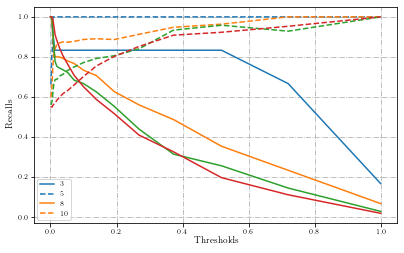

In [101]:
TICK_PADDING = 2
LABELPAD = 3
DIMS = [3,5,8,10]
COLORS = ["tab:blue","tab:orange","tab:green","tab:red"]


fig = plt.figure(figsize=figsizes.neurips2022(nrows=1, ncols=1)['figure.figsize'])

ax = fig.add_subplot(111)
ax.grid(True, which="both", ls="-.")
ax.set_axisbelow(True)

for rec_nl,prec_nl, c in zip(recalls_nl, precisions_nl, COLORS):
    im = ax.plot(thresholds[0,:], rec_nl, c=c)
    im = ax.plot(thresholds[0,:], prec_nl, c=c, ls="--")
# for rec_lin,prec_lin, c in zip(recalls_lin,precisions_lin, COLORS):
#     im = ax.plot(thresholds[0,:], rec_lin, c=c, ls="--")
#     im = ax.plot(thresholds[0,:], prec_lin, c=c, ls="--")
# ax.plot(np.linspace(.85, 6), -np.linspace(.85, 6), c="black", label='$y=x^{-2}$')
ax.set_ylabel("Recalls", labelpad=LABELPAD)
ax.set_xlabel("Thresholds", labelpad=LABELPAD)
plt.legend(DIMS)
ax.tick_params(axis='both', which='major', pad=TICK_PADDING)

# ax = fig.add_subplot(122)
# ax.grid(True, which="both", ls="-.")
# ax.set_axisbelow(True)

# im = ax.plot(thresholds.T, recalls_lin.T, ls="--", c=COLORS)
# ax.plot(np.linspace(.85, 6), -np.linspace(.85, 6), c="black", label='$y=x^{-2}$')
# ax.set_ylabel("Recalls (Lin)", labelpad=LABELPAD)
ax.set_xlabel("Thresholds", labelpad=LABELPAD)
plt.legend(DIMS)
ax.tick_params(axis='both', which='major', pad=TICK_PADDING)

plt.savefig("recalls.svg")

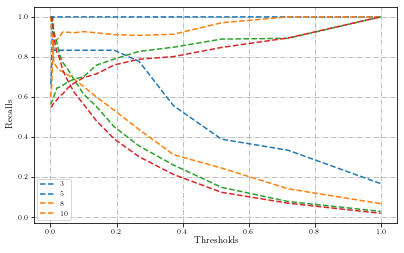

In [100]:
fig = plt.figure(figsize=figsizes.neurips2022(nrows=1, ncols=1)['figure.figsize'])

ax = fig.add_subplot(111)
ax.grid(True, which="both", ls="-.")
ax.set_axisbelow(True)
#
# for rec_nl,prec_nl, c in zip(recalls_nl, precisions_nl, COLORS):
#     im = ax.plot(thresholds[0,:], rec_nl, c=c)
#     im = ax.plot(thresholds[0,:], prec_nl, c=c)
for rec_lin,prec_lin, c in zip(recalls_lin,precisions_lin, COLORS):
    im = ax.plot(thresholds[0,:], rec_lin, c=c, ls="--")
    im = ax.plot(thresholds[0,:], prec_lin, c=c, ls="--")
# ax.plot(np.linspace(.85, 6), -np.linspace(.85, 6), c="black", label='$y=x^{-2}$')
ax.set_ylabel("Recalls", labelpad=LABELPAD)
ax.set_xlabel("Thresholds", labelpad=LABELPAD)
plt.legend(DIMS)
ax.tick_params(axis='both', which='major', pad=TICK_PADDING)

# ax = fig.add_subplot(122)
# ax.grid(True, which="both", ls="-.")
# ax.set_axisbelow(True)

# im = ax.plot(thresholds.T, recalls_lin.T, ls="--", c=COLORS)
# ax.plot(np.linspace(.85, 6), -np.linspace(.85, 6), c="black", label='$y=x^{-2}$')
# ax.set_ylabel("Recalls (Lin)", labelpad=LABELPAD)
ax.set_xlabel("Thresholds", labelpad=LABELPAD)
plt.legend(DIMS)
ax.tick_params(axis='both', which='major', pad=TICK_PADDING)

plt.savefig("recalls.svg")

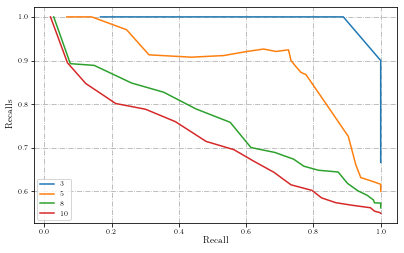

In [104]:
fig = plt.figure(figsize=figsizes.neurips2022(nrows=1, ncols=1)['figure.figsize'])

ax = fig.add_subplot(111)
ax.grid(True, which="both", ls="-.")
ax.set_axisbelow(True)
#
# for rec_nl,prec_nl, c in zip(recalls_nl, precisions_nl, COLORS):
#     im = ax.plot(thresholds[0,:], rec_nl, c=c)
#     im = ax.plot(thresholds[0,:], prec_nl, c=c)
for rec_lin,prec_lin, c in zip(recalls_lin,precisions_lin, COLORS):
    im = ax.plot(rec_lin, prec_lin, c=c)
ax.set_ylabel("Recalls", labelpad=LABELPAD)
ax.set_xlabel("Precision", labelpad=LABELPAD)
plt.legend(DIMS)
ax.tick_params(axis='both', which='major', pad=TICK_PADDING)

ax.set_xlabel("Recall", labelpad=LABELPAD)
plt.legend(DIMS)
ax.tick_params(axis='both', which='major', pad=TICK_PADDING)

plt.savefig("recalls.svg")

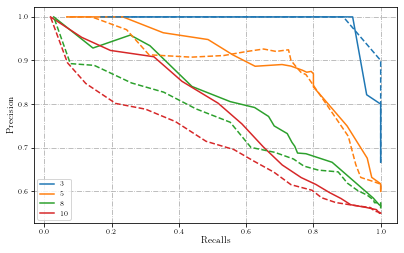

In [112]:
fig = plt.figure(figsize=figsizes.neurips2022(nrows=1, ncols=1)['figure.figsize'])

ax = fig.add_subplot(111)
ax.grid(True, which="both", ls="-.")
ax.set_axisbelow(True)
#
for rec_nl,prec_nl, c in zip(recalls_nl, precisions_nl, COLORS):
    im = ax.plot(rec_nl, prec_nl, c=c)
for rec_lin,prec_lin, c in zip(recalls_lin,precisions_lin, COLORS):
    im = ax.plot(rec_lin, prec_lin, c=c, ls="--")
    # im = ax.plot(thresholds[0,:], prec_nl, c=c)

ax.set_xlabel("Recalls", labelpad=LABELPAD)
ax.set_ylabel("Precision", labelpad=LABELPAD)
plt.legend(DIMS)
ax.tick_params(axis='both', which='major', pad=TICK_PADDING)


plt.savefig("recalls.svg")

## Hinton diagram

In [ ]:
# Source: https://matplotlib.org/3.1.1/gallery/specialty_plots/hinton_demo.html

def hinton(matrix, max_weight=None, ax=None):
    """Draw Hinton diagram for visualizing a weight matrix."""
    ax = ax if ax is not None else plt.gca()

    if not max_weight:
        max_weight = 2 ** np.ceil(np.log(np.abs(matrix).max()) / np.log(2))


    ax.patch.set_facecolor('gray')
    ax.set_aspect('equal', 'box')
    ax.xaxis.set_major_locator(plt.NullLocator())
    ax.yaxis.set_major_locator(plt.NullLocator())

    for (x, y), w in np.ndenumerate(matrix):
        color = BLUE if w > 0 else RED
        size = np.sqrt(np.abs(w) / max_weight)
        rect = plt.Rectangle([x - size / 2, y - size / 2], size, size,
                             facecolor=color, edgecolor=color)
        ax.add_patch(rect)

    ax.autoscale_view()

In [260]:
from notebooks.analysis import perm2matrix

In [249]:
idx = -1
j_est = est_unmix_jacobians3d[idx]
j_gt = true_unmix_jacobians3d[idx]
j_p= permute_indices3d[idx]
j_pm= perm2matrix(j_p)
# j_gt_p = j_pm.numpy() @ j_gt
j_est_corr = correct_ica_scale_permutation(torch.from_numpy(j_est.astype(np.float32)),j_pm,torch.from_numpy(j_gt.astype(np.float32))).numpy()

In [250]:
j_est_corr

array([[ 1.5320351 , -0.01130555, -0.00469695],
       [ 1.5820673 ,  1.8025558 , -0.01033536],
       [ 1.96809   ,  1.4212089 ,  1.5321796 ]], dtype=float32)

In [318]:
true_unmix_jacobians_monti

[array([[ 0.00252052,  0.        ,  0.        ,  0.        ,  0.        ,
          0.        ],
        [-0.01277678,  0.00205859,  0.        ,  0.        ,  0.        ,
          0.        ],
        [ 0.03138999, -0.01081219,  0.0021257 ,  0.        ,  0.        ,
          0.        ],
        [-0.07721966,  0.03315201, -0.01093221,  0.00156558,  0.        ,
          0.        ],
        [ 0.14143941, -0.06895113,  0.02950584, -0.00946515,  0.00222511,
          0.        ],
        [-0.20769876,  0.10927062, -0.05303581,  0.02336621, -0.00951978,
          0.0020853 ]]),
 array([[ 0.00163575,  0.        ,  0.        ,  0.        ,  0.        ,
          0.        ],
        [-0.00963337,  0.00209877,  0.        ,  0.        ,  0.        ,
          0.        ],
        [ 0.02328577, -0.00941281,  0.00175942,  0.        ,  0.        ,
          0.        ],
        [-0.04222301,  0.02079622, -0.00729232,  0.00161148,  0.        ,
          0.        ],
        [ 0.06250732, -0.036